#  Лабораторная работа №1 «Дискретизация аналоговых сигналов»



# Занятие 1. Классификация сигналов: аналоговые, дискретные, цифровые.

In [1]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
import scipy.io.wavfile # импорт модуля scipy.io.wavfile

In [2]:
# Если используете Jupyter, то можно поменять backend matplotlib на notebook
%matplotlib notebook
# Для использования backend matplotlib inline, раскомментируйте строку ниже.
%matplotlib inline

In [3]:
def quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=5):
    """Uniform quantization approach
    From: Müller M. Fundamentals of music processing: Audio, analysis, algorithms, applications. – Springer, 2015.
    Notebook: C2S2_DigitalSignalQuantization.ipynb
    Args:
        x: Original signal
        quant_min: Minimum quantization level
        quant_max: Maximum quantization level
        quant_level: Number of quantization levels
    Returns:
        x_quant: Quantized signal
    """
    x_normalize = (x-quant_min) * (quant_level-1) / (quant_max-quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.around(x_normalize)
    x_quant = (x_normalize_quant) * (quant_max-quant_min) / (quant_level-1) + quant_min
    return x_quant

In [4]:
import scipy.integrate as integrate # импорт модуля численного интегрирования
def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла
def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    # вычисление преобразования Фурье для набора частот
    # signal - функция от t и tau, задающая сигнал во временной области 
    # f_band - набор частот, для которых вычисляется преобразование Фурье
    # tau - константа, используемая для задания длительности импульса
    # t1 момент начала сигнала
    # t2 момент завершения сигнала
    # тип возвращаемого значения:
    # res_type='abs' - |X(f)|
    # res_type='Re' - Re X(f)
    # res_type='Im' - Im X(f)
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im

## Задача 0. Введение в Python 3. (Задание к допуску)

1) Подгрузить библиотеку *Numpy* (`import numpy as np`).

2) Создать массив от 1 до 10 с шагом 2 – [1, 3, 5, 7, 9] – тремя разными способами (используя  три разные функции `np.array()`, `np.arange()`, `np.linspace()`).

3) Создать массив целых чисел от 0 до 100 (размерностью 100 элементов) максимально короткой записью.

4) Создать массив `k`, такой же как описан в п.3. Используя его, создать массив (набор отсчетов) `x`, соответствующий формуле $x[k] = \sin(2\pi \dfrac{f_0}{f_s}k)$, где $\dfrac{f_0}{f_s}$ взять равным 0.07. Следует использовать функцию `np.sin()` и константу `np.pi`.

5) Подгрузить модуль *pyplot* библиотеки *Matplotlib* (`import matplotlib.pyplot as plt`).

6) Создать холст (другие названия полотно, канва) размером 12 на 5 дюйма (`figsize = [12, 5]`).

7) Построить график $x[k]$ (`plt.plot(k, x)`), сделать подписи осей и заголовок графика.

8) Поменять цвет линии графика из п.7 на красный или оранжевый и тип линии на пунктир. Построить на графике отсчеты $x[k]$ с помощью функции `plt.stem(k, x)`, см. Задача 1.1 и Задача 1.2.  
(Для того чтобы поменять тип линии на пунктир, нужно в параметре отвечающем за цвет поставить модификатор "--", например `'--b'`.)

9) Работа с функциями.
  1. Создать функцию, соответствующую формуле $\dfrac{\sin(x)}{x}$. `def my_fun(x):`
  2. Незабыть обработать неопределенность в 0.  
  `if x=0:`  
  ....`return 1`  
  `else`  
  ....`return np.sin(x)/x`
  3. Выполнить п.4 и п.7, создав новый массив значений `y`, используя созданную вами функцию.

10)  Выполнить п.4, только для массива `z`, который соответствует комплексной экспоненциальной функции $z[k] = \exp(-j\,2\pi\,\dfrac{f_0}{f_s}k)$  (функция `np.exp()`). Выполнить п.7, но построить отдельно график реальной и график мнимой частей этой функции.

In [5]:
# Task 1
import numpy as np
# Task 2
a = np.array([1, 3, 5, 7, 9])
b = np.arange(start=1, stop=10, step=2)
c = np.linspace(1, 9, 5)
a, b, c

(array([1, 3, 5, 7, 9]), array([1, 3, 5, 7, 9]), array([1., 3., 5., 7., 9.]))

In [6]:
# Task 3
np.arange(0, 101)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [7]:
# Task 4
k = np.arange(0, 101)
x = np.sin(2*np.pi*0.07*k)
x

array([ 0.00000000e+00,  4.25779292e-01,  7.70513243e-01,  9.68583161e-01,
        9.82287251e-01,  8.09016994e-01,  4.81753674e-01,  6.27905195e-02,
       -3.68124553e-01, -7.28968627e-01, -9.51056516e-01, -9.92114701e-01,
       -8.44327926e-01, -5.35826795e-01, -1.25333234e-01,  3.09016994e-01,
        6.84547106e-01,  9.29776486e-01,  9.98026728e-01,  8.76306680e-01,
        5.87785252e-01,  1.87381315e-01, -2.48689887e-01, -6.37423990e-01,
       -9.04827052e-01, -1.00000000e+00, -9.04827052e-01, -6.37423990e-01,
       -2.48689887e-01,  1.87381315e-01,  5.87785252e-01,  8.76306680e-01,
        9.98026728e-01,  9.29776486e-01,  6.84547106e-01,  3.09016994e-01,
       -1.25333234e-01, -5.35826795e-01, -8.44327926e-01, -9.92114701e-01,
       -9.51056516e-01, -7.28968627e-01, -3.68124553e-01,  6.27905195e-02,
        4.81753674e-01,  8.09016994e-01,  9.82287251e-01,  9.68583161e-01,
        7.70513243e-01,  4.25779292e-01, -2.69546092e-15, -4.25779292e-01,
       -7.70513243e-01, -

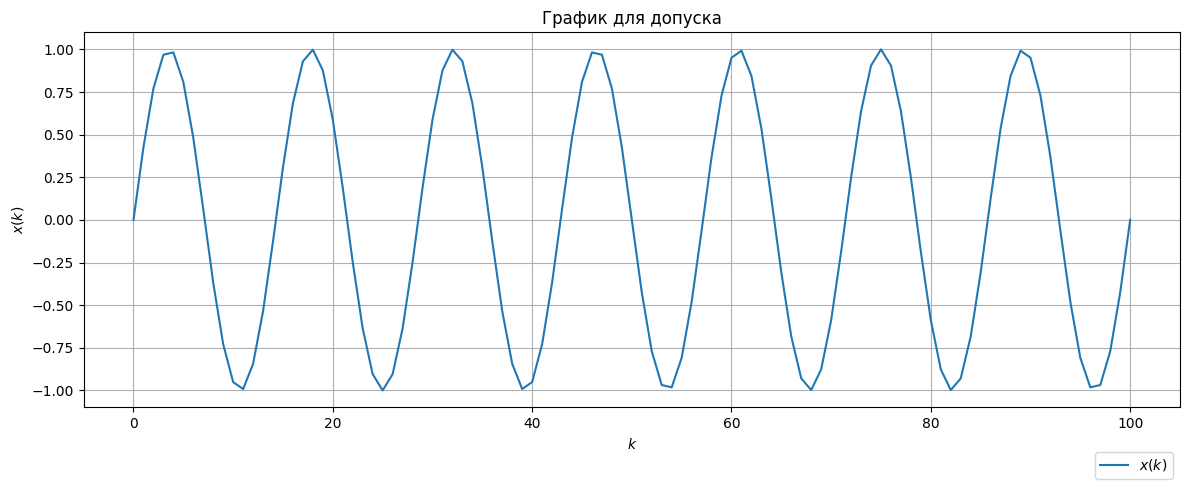

In [8]:
# Task 5
import matplotlib.pyplot as plt
# Task 6
plt.figure(figsize=[12, 5])              # создание полотна размером шириной 12 X 5 дюймов
# Task 7
plt.plot(k, x, label='$x(k)$')
plt.grid()                              # сетка
plt.xlabel("$k$")                    # подпись оси X
plt.ylabel("$x(k)$")              # подпись оси Y
plt.title("График для допуска") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()

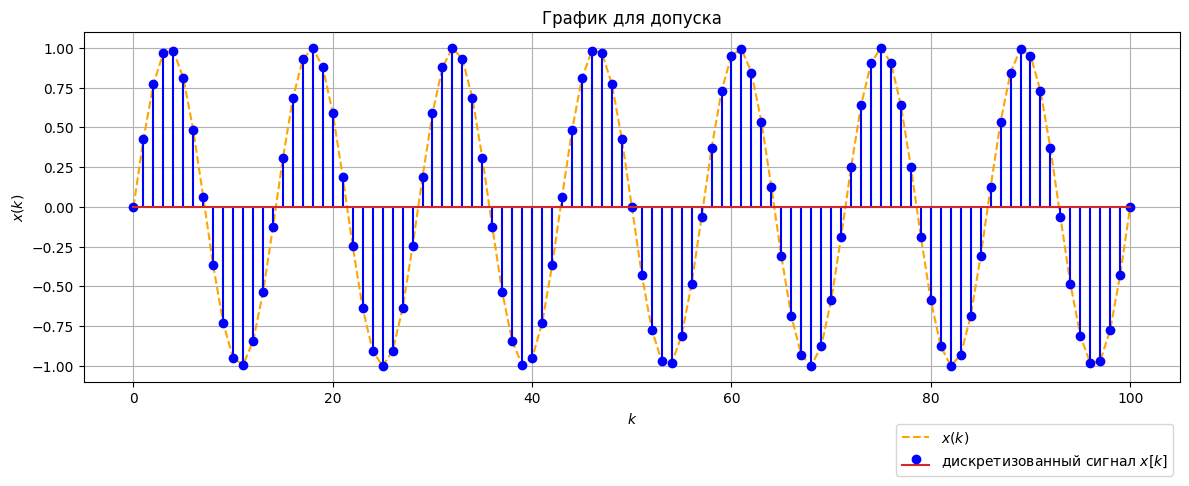

In [9]:
# Task 8
plt.figure(figsize=[12, 5])              # создание полотна размером шириной 12 X 5 дюймов
plt.plot(k, x, "--", color="orange", label='$x(k)$')
plt.stem(k, x, linefmt='b', markerfmt='bo', label='дискретизованный сигнал $x[k]$')            
plt.grid()                              # сетка
plt.xlabel("$k$")                    # подпись оси X
plt.ylabel("$x(k)$")              # подпись оси Y
plt.title("График для допуска") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()

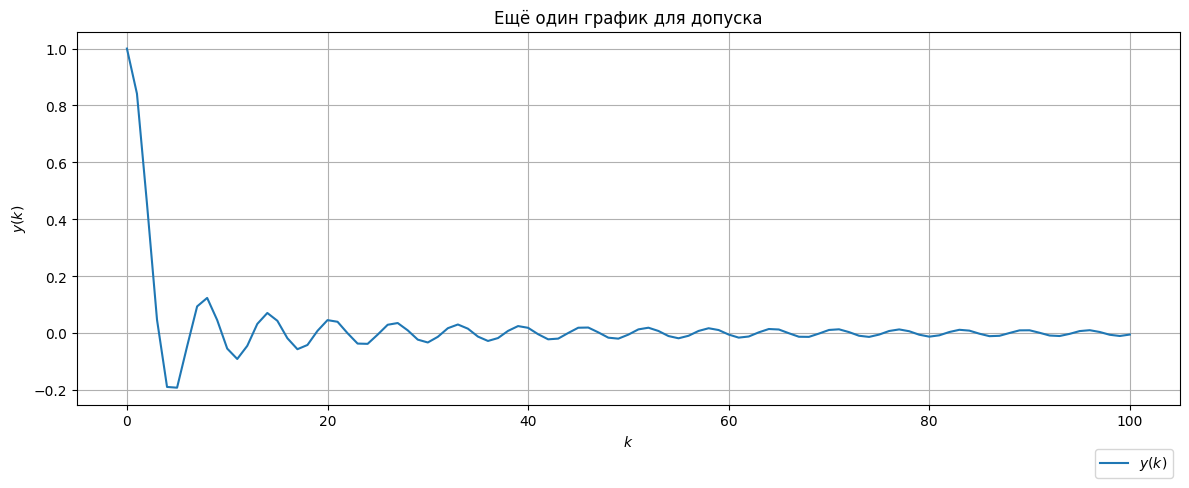

In [10]:
# Task 9
def my_fun(x):
    if x == 0:
        return 1
    return np.sin(x)/x

k = np.arange(0, 101)
y = [my_fun(elem) for elem in k]

plt.figure(figsize=[12, 5])              # создание полотна размером шириной 12 X 5 дюймов
plt.plot(k, y, label='$y(k)$')        
plt.grid()                              # сетка
plt.xlabel("$k$")                    # подпись оси X
plt.ylabel("$y(k)$")              # подпись оси Y
plt.title("Ещё один график для допуска") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()

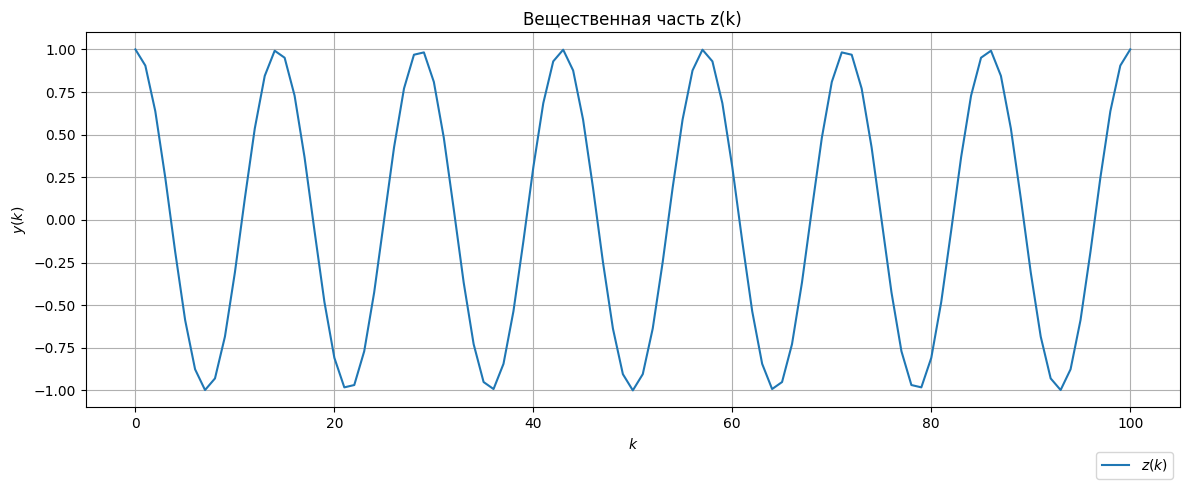

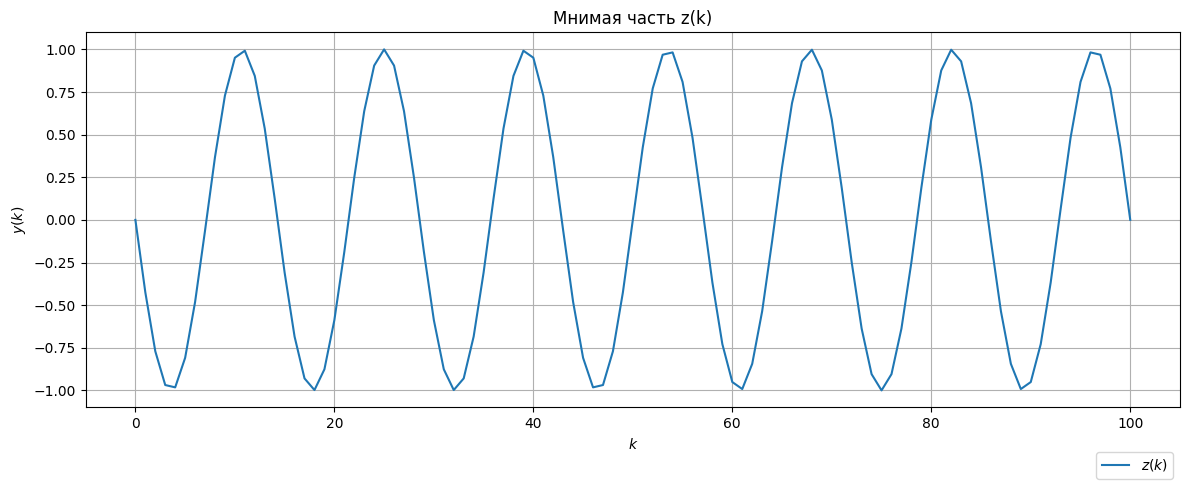

In [11]:
# Task 10
k = np.arange(0, 101)
z = np.exp(-1j*2*np.pi*0.07*k)

# Real part
plt.figure(figsize=[12, 5])              # создание полотна размером шириной 12 X 5 дюймов
plt.plot(k, z.real, label='$z(k)$')        
plt.grid()                              # сетка
plt.xlabel("$k$")                    # подпись оси X
plt.ylabel("$y(k)$")              # подпись оси Y
plt.title("Вещественная часть z(k)") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()

# Imaginary part
plt.figure(figsize=[12, 5])              # создание полотна размером шириной 12 X 5 дюймов
plt.plot(k, z.imag, label='$z(k)$')        
plt.grid()                              # сетка
plt.xlabel("$k$")                    # подпись оси X
plt.ylabel("$y(k)$")              # подпись оси Y
plt.title("Мнимая часть z(k)") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()

## Задача 1.1. Дискретизация и квантование.

| Варианты: |   1 |    2 |    3 |   4 |    5 |    6 |    7 |    8 |    9 |   10 |   11 |   12 |
|:---------:|----:|-----:|-----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|     **N**     |  15 |   20 |   30 |  12 |   15 |   30 |   25 |   18 |   10 |   25 |   20 |   15 |
|   $f_0$**, Гц**   | 200 |  250 |  400 | 200 |  600 |  750 | 1200 |  600 |  400 |  500 |  800 |  400 |
|   $f_s$**, Гц**   | 500 | 1250 | 2000 | 600 | 1500 | 3750 | 6000 | 1800 | 1000 | 2500 | 4000 | 1200 |

Промоделировать дискретизацию и квантование синусоидального сигнала $x(t)=\sin(2\pi f_0 t)$ с частотой дискретизации $f_s$. Пронаблюдать эффекты во временной области для отрезка сигнала из $N$ отсчетов. 

1) Как соотносится растояние между отсчетами по оси времени с частотой дискретизации?

2) Как изменяется максимально возможная абсолютная ошибка квантования $\varepsilon[k]=|x[k]-y[k]|$ с ростом числа уровней квантования?

In [12]:
# Вариант 4 (16 mod 12)
N=12                                    # Число отсчетов по времени
f0=200.0                                # Частота синусоиды в Гц
fs=600.0                               # Частота дискретизации в Гц
k=np.arange(N)                          # Mассив времен k от 0 до N-1 с шагом 1
x=np.sin(2*np.pi*(f0/fs)*k)             # Последовательность x[k]
num_levels=8                      # число уровней квантования

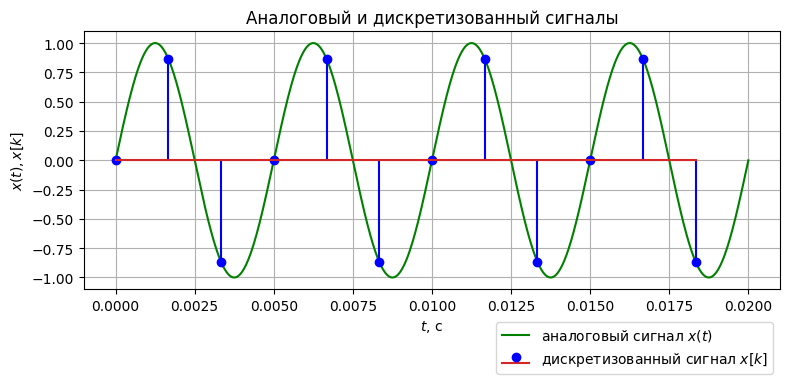

In [13]:
# Построение графиков аналогового и дискретизованного сигнала
plt.figure(figsize=[8, 4])              # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)        # создание массива времен t (1024 значения от 0 до N*fs)

plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')  
                                        # построение графика x(t) (точки соединяются линиями)
                                        # 'g' означает, что используется зеленая линия (green)
plt.stem(k/fs, x, linefmt='b', markerfmt='bo', label='дискретизованный сигнал $x[k]$')            
                                        # построение графика функции дискретного времени x[k]
                                        # 'b', 'bo' означает, что отсчеты оборажаются синим цветом (blue)
plt.grid()                              # сетка
plt.xlabel("$t$, c")                    # подпись оси X
plt.ylabel("$x(t), x[k]$")              # подпись оси Y
plt.title("Аналоговый и дискретизованный сигналы") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()                      # автоматическая корректировка расположения осей графика

In [14]:
# моделирование квантования дискретного сигнала
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels)
bins=np.linspace(-1, 1, num_levels)

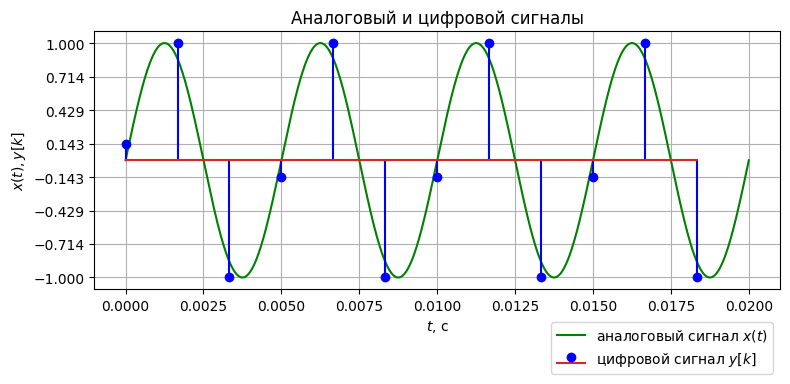

In [15]:
# Вывод графика аналогового и цифрового сигнала
plt.figure(figsize=[8, 4])                  # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)            # создание массива времен t (1024 значения от 0 до N*fs)
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')        
                                            # построение графика x(t) (точки соединяются линиями)

plt.stem(k/fs, y, linefmt='b', markerfmt='bo', label='цифровой сигнал $y[k]$')                
                                            # построение графика функции дискретного времени y[k]
                                            # k/fs - м
    
if num_levels<21:                           # если число уровней не велико, то производится
    plt.yticks(bins)                        # установка делений шкалы оси Y, совпадающих с уровнями квантования

plt.grid()                                  # сетка
plt.xlabel("$t$, c")                        # подпись оси X
plt.ylabel("$x(t), y[k]$")                  # подпись оси Y
plt.title("Аналоговый и цифровой сигналы")  # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()                          # автоматическая корректировка расположения осей графика

In [16]:
abs(x-y)

array([0.14285714, 0.1339746 , 0.1339746 , 0.14285714, 0.1339746 ,
       0.1339746 , 0.14285714, 0.1339746 , 0.1339746 , 0.14285714,
       0.1339746 , 0.1339746 ])

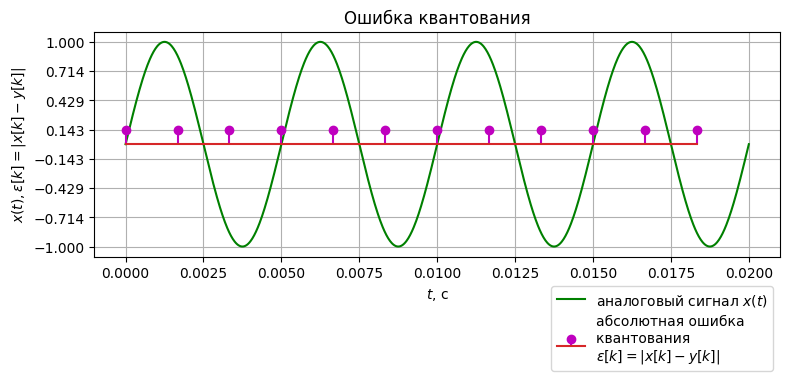

In [17]:
plt.figure(figsize=[8, 4])
plt.title("Ошибка квантования") 
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, abs(x-y), linefmt='m', markerfmt='mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")       
                                      #вывод абсолютных значений ошибки квантования для дискретного сигнала
plt.yticks(bins)
plt.grid()
plt.xlabel("$t$, c")                                          # подпись оси X
plt.ylabel("$x(t), \\varepsilon[k]=|x[k]-y[k]|$")             # подпись оси Y
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout() 
plt.show()

Промоделировать дискретизацию и квантование синусоидального сигнала $x(t)=\sin(2\pi f_0 t)$ с частотой дискретизации $f_s$. Пронаблюдать эффекты во временной области для отрезка сигнала из $N$ отсчетов.

1) Как соотносится растояние между отсчетами по оси времени с частотой дискретизации? (больше f меньше расстояние)

$\Delta t= \frac{1}{f_{s}} = \frac{1}{600}$ c

2) Как изменяется абсолютная ошибка квантования $\varepsilon[k]=|x[k]-y[k]|$ с ростом числа уровней квантования? (уменьшиться)

## Задача 1.2. Декодирование .wav файла

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |         7        |       8      |        9       |     10    |        11       |     12     |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:----------------:|:------------:|:--------------:|:---------:|:---------------:|:----------:|
| **Имя файла** | clarinet.wav | flute.wav | glockenspiel.wav | guitar.wav | tuning-fork.wav | vibraphone.wav | glockenspiel.wav | clarinet.wav | vibraphone.wav | flute.wav | tuning-fork.wav | guitar.wav |

Декодируйте .wav файл в соотвествии с Вашим вариантом из таблицы. 

1) Определите частоту дискретизации, битную глубину записи (соотвествует dtype) и соотвествующее ей колличество уровней квантования. 

2) Сравните растояние между отсчетами по оси времени на графике с частотой дискретизации.

3) Поменяйте ось времени (первый аргумент функции `plt.plot`) так, чтобы первому отсчету наблюдаемого диапазона соотвествовало время от начала файла.

4) Определите длину записи в секундах.

5) Оцените объем файла в килобайтах (КБ), при условии, что никакое дополнительное сжатие не производится (использовать данные о частоте дискретизации, числе отсчетов и битовой глубине). Сравние с реальным объемом файла. 

In [18]:
from IPython.display import Audio
Audio('guitar.wav')

In [19]:
fs, x = scipy.io.wavfile.read('guitar.wav') # чтение аудиофайла 

C:\Users\Сергей\AppData\Local\Temp\ipykernel_9376\2035929640.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = scipy.io.wavfile.read('guitar.wav') # чтение аудиофайла


In [20]:
fs     #частота дискретизации в Гц

44100

In [21]:
x      #массив значений x[k]

array([ -37,  -31,  -37, ..., -118, -124, -131], dtype=int16)

In [22]:
print(x.dtype) #тип данных для значений x[k]

int16


In [23]:
x.size #размер массива

639450

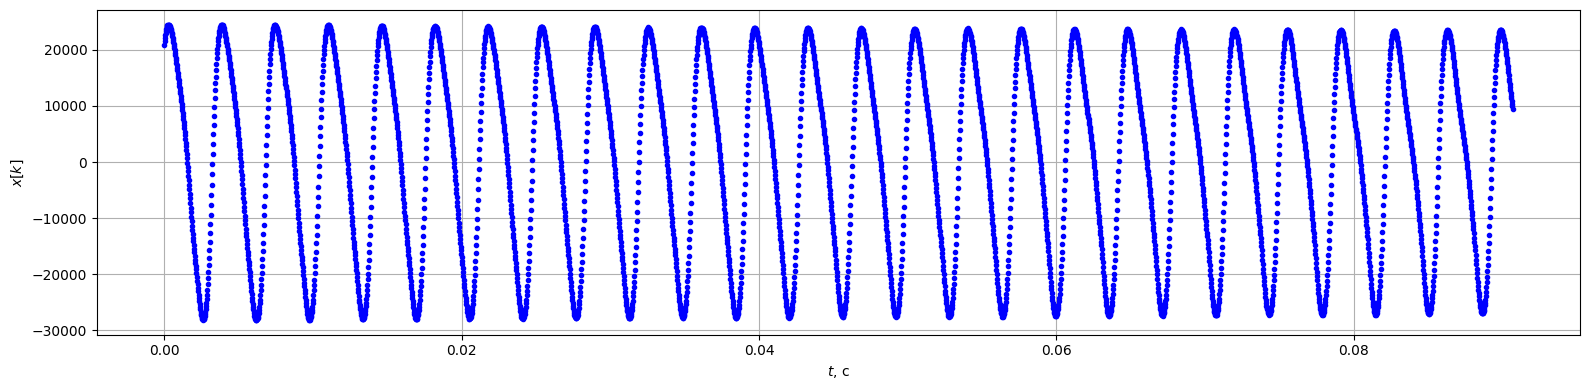

In [24]:
x1=x[96000:100000]                 # выбор наблюдаемого диапазона
k=np.arange(x1.size)               # отсчеты по времени
# Построение графиков
plt.figure(figsize=[16, 4])        # создание полотна размером шириной 16 X 4 дюйма
plt.plot(k/fs, x1, 'b.')           # построение графика цифрового сигнала точками точками
plt.grid()                             
plt.xlabel("$t$, c")                      
plt.ylabel("$x[k]$")             
plt.tight_layout()

In [25]:
import os
print(f"Частота дискретизации равна {fs} Гц")
dtype = str(x.dtype)
deep = int(dtype.replace('int', ''))
print(f"Битная глубина - {deep} бит")
print(f"Число уровней квантования - {2**deep} ")
print(f"Число отсчётов равно - {x.size}, частота дискретизации равна - {fs} Гц")
print(f"Длина записи - {x.size/fs} с")
print(f"Размер файла - {x.size * deep / (8 * 1024)} КБ,\
 реальный размер - {os.stat('guitar.wav').st_size/1024} КБ")

Частота дискретизации равна 44100 Гц
Битная глубина - 16 бит
Число уровней квантования - 65536 
Число отсчётов равно - 639450, частота дискретизации равна - 44100 Гц
Длина записи - 14.5 с
Размер файла - 1248.92578125 КБ, реальный размер - 1248.984375 КБ


# Занятие 2. Спектры импульсных и периодических сигналов.

## Задача 2.1. Спектры симметричных оконных функций

|  Варианты:  |  1  |  2  |   3  |   4  |  5  |   6  |  7  |   8  |   9  |  10 |  11  |  12  |
|:-----------:|:---:|:---:|:----:|:----:|:---:|:----:|:---:|:----:|:----:|:---:|:----:|:----:|
| $\tau$**, мкс** | 100 | 500 | 1000 | 5000 | 400 | 2000 | 300 | 1500 | 3000 | 800 | 3500 | 4000 |


Ниже приведен пример вычисления модуля спектральной плотности $|X(f)|$ для прямоугольного окна длительностью $\tau=150$ мкс. 

Для заданного параметра $\tau$ из таблицы, построить графики модуля спектральной плотности $|X(f)|$ для прямоугольного окна, 
$$w_b(t)=\left\{ \begin{matrix}
   1, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2; \\
\end{matrix} \right.$$
треугольного окна
$$w_t(t)=\left\{ \begin{matrix}
   1-\dfrac{|t|}{\tau /2}, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$
 и окна Ханна
$$w_H(t)=\left\{ \begin{matrix}
   \dfrac{1}{2}\left( 1+\cos \left( 2\pi \dfrac{t}{\tau } \right) \right), & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$



Привести аналитические формулы спектральной плотности для этих импульсов. 
Определить 
* а) уровни первого бокового лепестка относительно главного в $|X(f)|$ (практич.) в дБ ($20\lg  \left|\dfrac{X(f)}{X(0)}\right| $ ),
* б) расположение нулей $|X(f)|$ (практич. и теоретическое).

Заполнить таблицу для трех окон.

| Окна  |   Уровень первого бокового лепестка относительно главного, дБ  |  Ширина главного лепестка, Гц  |
|:-----------:|:---:|:---:|
| прямоугольное |  -13   |   400    |
| треугольное |  -24   |    800   |
| Ханна |  -28   |    800   |


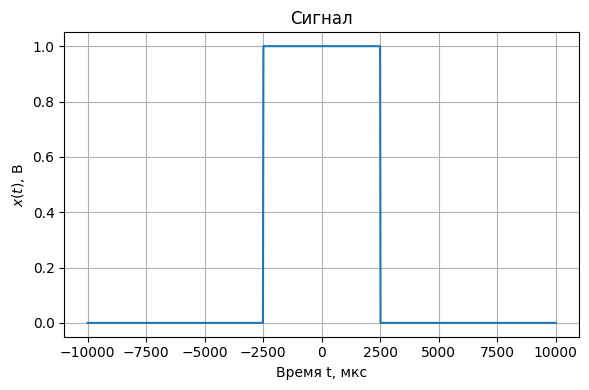

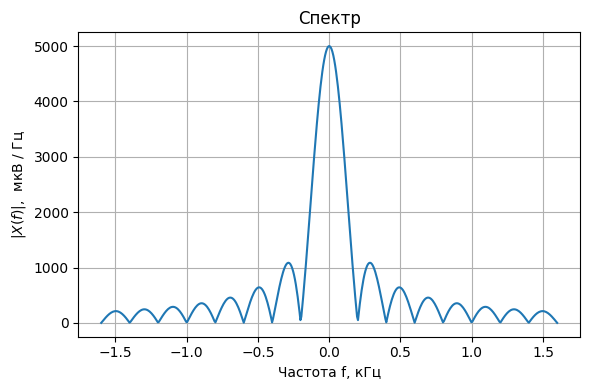

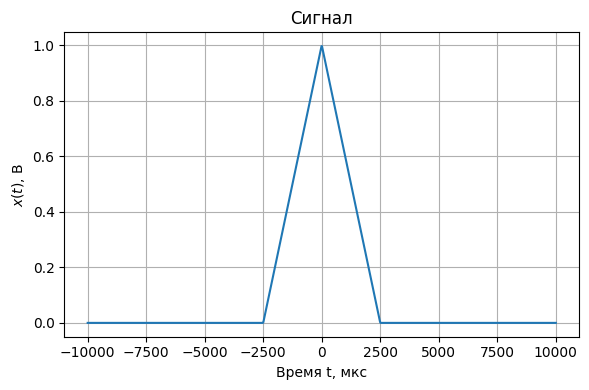

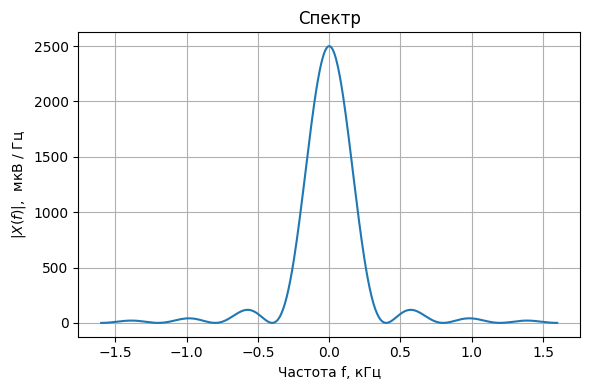

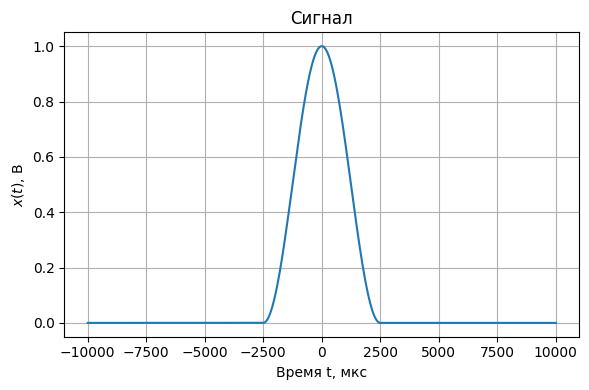

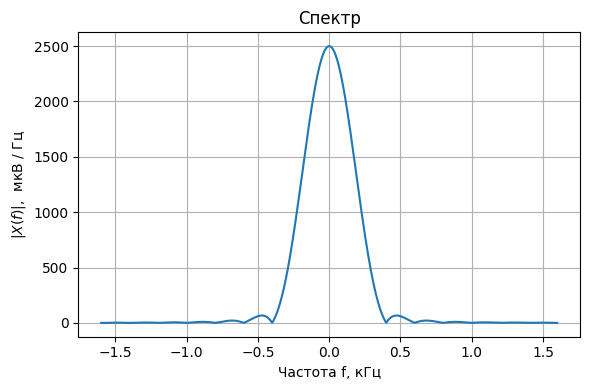

In [26]:
tau=5000e-6 #5000 мкс (Вариант 4) ((16 % 12))

f_band=np.linspace(-8/tau, 8/tau, 500) # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t)<tau/2:
        return 1.0
    else:
        return 0.0

def triangle(t, tau):
    if abs(t) < tau/2:
        return 1 - abs(t)/(tau/2)
    else:
        return 0.0

def Hann(t, tau):
    if abs(t)<tau/2:
        return 0.5 * (1 + np.cos(2*np.pi * t/tau))
    else:
        return 0.0             

# Прямоугольное окно
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout()
plt.grid()


plt.figure(figsize=[6, 4])
fourier = fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6
plt.plot(f_band/1e3, fourier)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout()
plt.grid()

# Треугольное окно
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [triangle(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout()
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=triangle, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout()
plt.grid()

# Окно Ханна
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [Hann(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout()
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=Hann, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout()
plt.grid()

## Задача 2.2. Теорема запаздывания для преобразования Фурье

|  Варианты:  |  1  |  2  |   3  |   4  |  5  |   6  |  7  |   8  |   9  |  10 |  11  |  12  |
|:-----------:|:---:|:---:|:----:|:----:|:---:|:----:|:---:|:----:|:----:|:---:|:----:|:----:|
|     **E, В**    | 0.1 | 0.5 |   1  |   5  |  1  |   5  | 0.5 |  2.5 |   6  | 1.6 |   7  |   8  |
| **$\tau$, мкс** | 100 | 500 | 1000 | 5000 | 400 | 2000 | 300 | 1500 | 3000 | 800 | 3500 | 4000 |

Ниже приведен пример вычисления спектральной плотности для несимметричного прямоугольного импульса амплитудой $E=0.1$ В, длительностью $\tau=100$ мкс. В данном случае импульс начинается в начале отсчета оси времени. 

Для заданных параметров $E$ и $\tau$ из таблицы, построить и сравнить графики $\text{Re} X(f)$, $\text{Im} X(f)$, $|X(f)|$ для прямоугольного импульса, начинающегося в моменты времени $-\tau /2$ и $0$. Как согласуются результаты с теоремой запаздывания для преобразования Фурье?


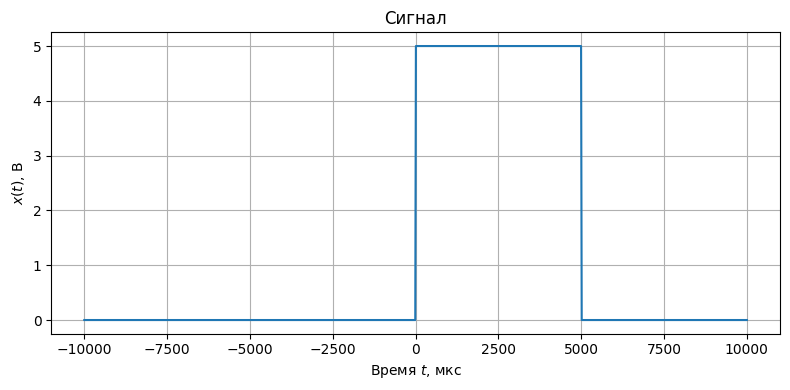

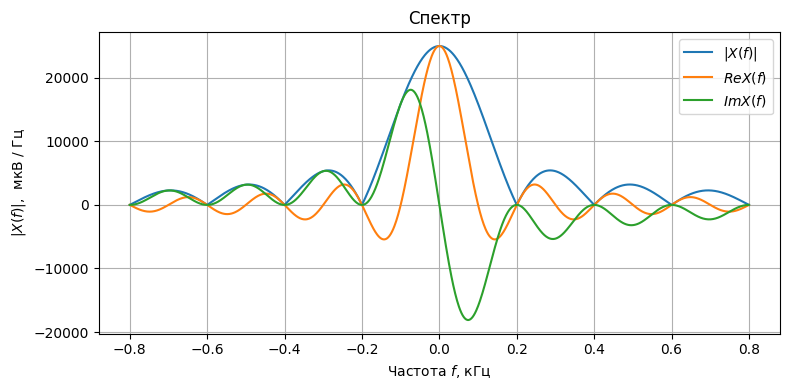

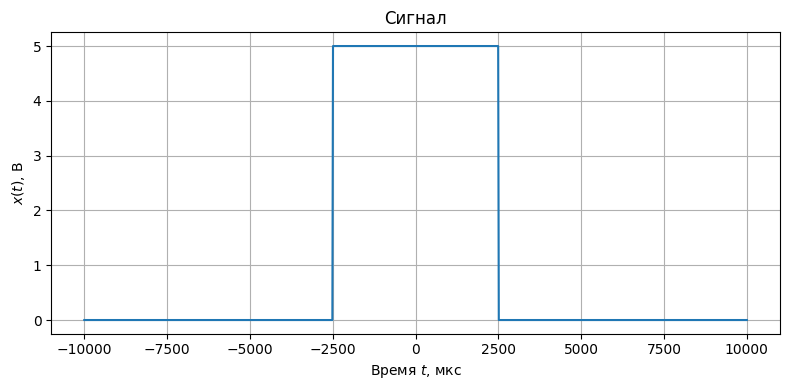

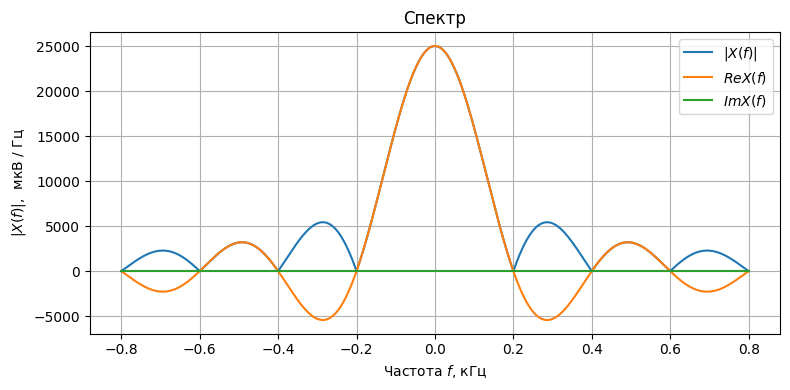

In [27]:
tau=5000*1e-6 #5000 мкс (Вариант 4)

f_band=np.linspace(-4/tau, 4/tau, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0<t<tau:
        return 5 # 5 В (Вариант 4)
    else:
        return 0.0 # 0 В
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

def delayed_boxcar(t, tau):
    if -tau/2<t<tau/2:
        return 5 # 5 В (Вариант 4)
    else:
        return 0.0 # 0 В

t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [delayed_boxcar(t, tau) for t in t_band])
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=delayed_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=delayed_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=delayed_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

Судя по совпадению графиков по модулю, действительно произошло просто домножение на некую экспоненту, просто фаза крутится, а модуль числа один и тот же. Теорема о запаздывании ПФ, похоже выполняется.

## Задача 2.3. Спектр отрезка синусоиды

|  Варианты:  |  1  |  2  |  3  |  4  |  5  |  6 |  7  |  8  |  9  | 10 |  11 |  12 |
|:-----------:|:---:|:---:|:---:|:---:|:---:|:--:|:---:|:---:|:---:|:--:|:---:|:---:|
|  $f_0$**, кГц** |  10 | 100 |  60 |  40 |  65 | 90 |  30 |  20 |  55 | 75 |  35 |  50 |
| $\tau$**, мкс** | 500 | 50  | 100 | 125 | 100 | 55 | 200 | 225 | 109 | 60 | 171 | 100 |

Ниже приведен пример вычисления спектральной плотности для отрезка синусоиды $x(t)=\sin(2\pi f_0 t)$ c частотой $f_0=10$ кГц длительностью  $\tau=500$  мкс. 

Для заданных параметров  $f_0$  и  $\tau$  из таблицы, построить $|X(f)|$ для отрезка синусоиды $x(t)=\sin(2\pi f_0 t)$ c частотой $f_0$ длительностью  $\tau$. 

1) Сравнить положение главных спектральных максимумов с частотой синусоиды. 

2) Повторить вычисления для отрезка синусоиды, взвешанного окном Ханна соотвествующей длины. Сравнить ширину главного лепестка на нулевом уровне и значение  $|X(f)|$ на частоте $f_0$ для сигнала $x(t)$, взвешанного прямоугольным окном и окном Ханна.

3) Сравнить спектр периодического сигнала  $x(t)=\sin(2\pi f_0 t)$ с получившимися графиками. 

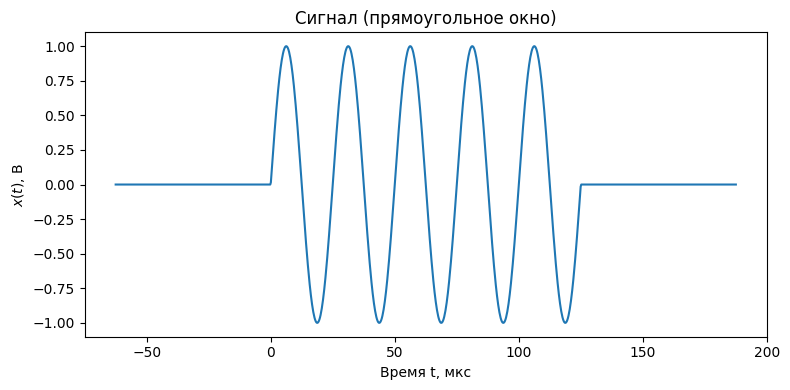

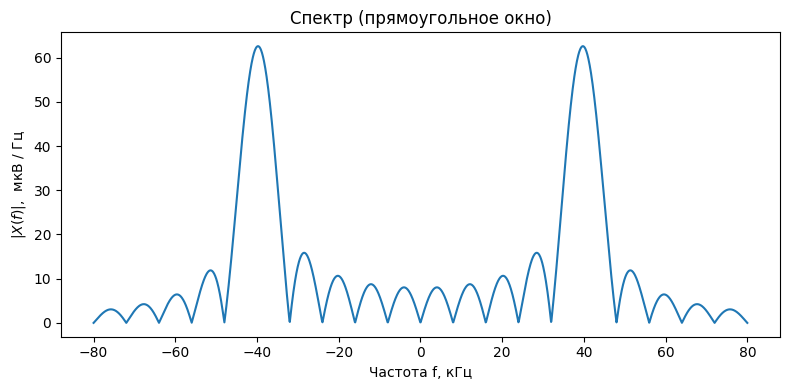

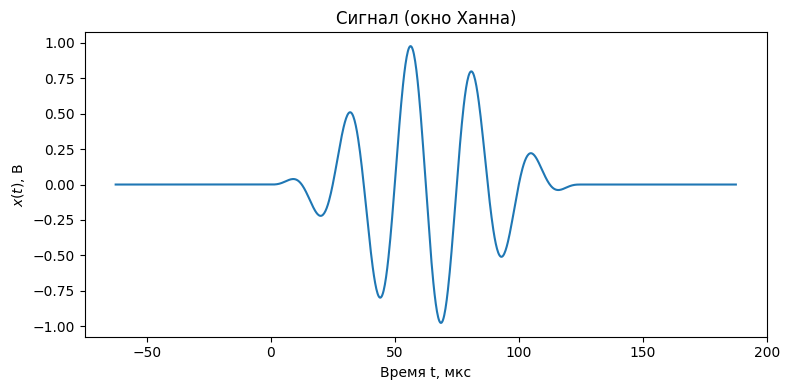

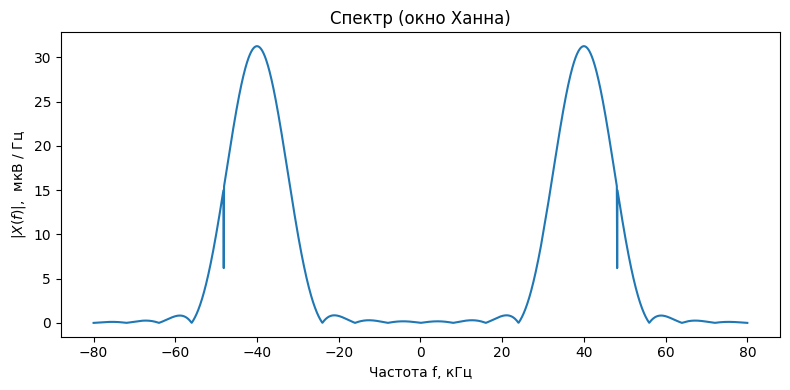

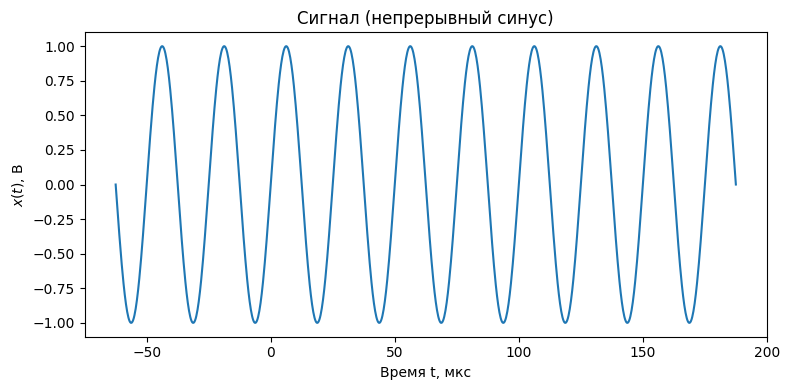

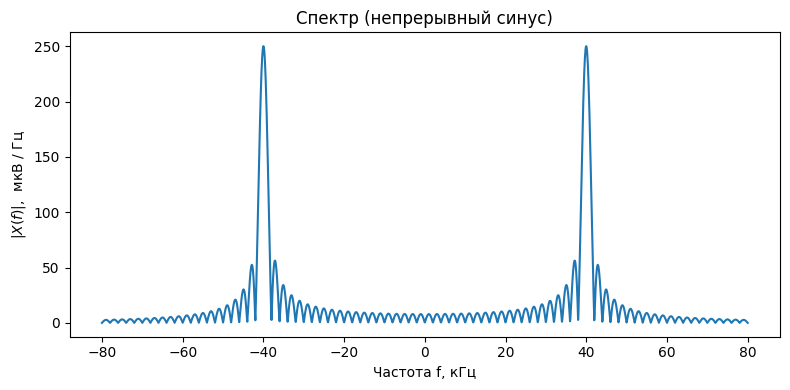

In [28]:
f0=40*1e3       # 40 кГц
tau=125*1e-6    # 125 мкс (Вариант 4)

def sin_with_boxcar(t, tau):
    if 0<=t<=tau:
        return np.sin(2*np.pi*f0*t)
    else:
        return 0.0

f_band=np.linspace(-2*f0, 2*f0, 2000)

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал (прямоугольное окно)")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр (прямоугольное окно)")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout()

def sin_with_Han(t, tau):
    if 0<=t<=tau:
        return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    else:
        return 0.0

plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_Han(t, tau) for t in t_band])
plt.title("Сигнал (окно Ханна)")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_Han, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр (окно Ханна)")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout()

def sin_with(t, tau):
    return np.sin(2*np.pi*f0*t)

plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with(t, tau) for t in t_band])
plt.title("Сигнал (непрерывный синус)")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр (непрерывный синус)")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout()

Во всех случаях спектральные максимумы находятся в точках $\pm 40$ кГц $= \pm f_{0}$

## Задача 2.4. Спектр пачки равноотстоящих импульсов

|    Варианты:    |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |  11 |  12 |
|:---------------:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|        N        |  3  |  4  |  3  |  4  |  3  |  4  |  3  |  4  |  3  |  4  |  3  |  4  |
| $\tau$**, мкс**     | 300 | 50  | 100 | 125 | 250 | 60  | 200 | 400 | 500 | 150 | 450 | 100 |
| $T_{period}$**, мкс** | 600 | 125 | 200 | 275 | 500 | 100 | 400 | 700 | 800 | 300 | 810 | 200 |

Ниже приведен пример вычисления спектр пачки из $N=4$ равноотстоящих импульсов длительностью $\tau = 100$ мкс с периодом повторения $T_{period}=400$ мкс.

Повторить вычисления для заданных значений $N$, $\tau$, $T_{period}$. Сравнить получившийся график с аналитическим выражением для спектра.


C:\Users\Сергей\AppData\Local\Temp\ipykernel_9376\1525074502.py:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
C:\Users\Сергей\AppData\Local\Temp\ipykernel_9376\1525074502.py:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])


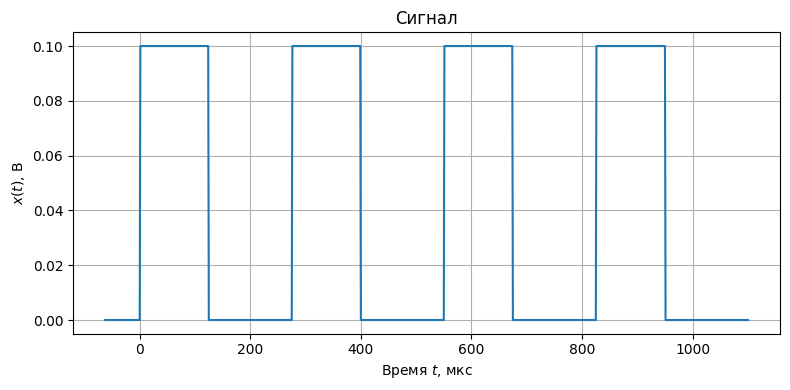

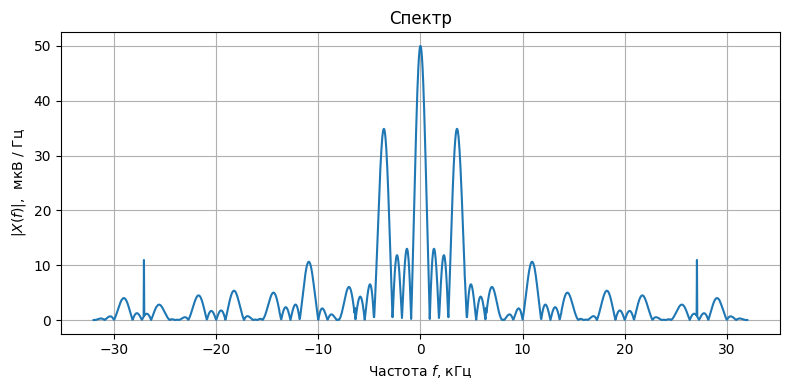

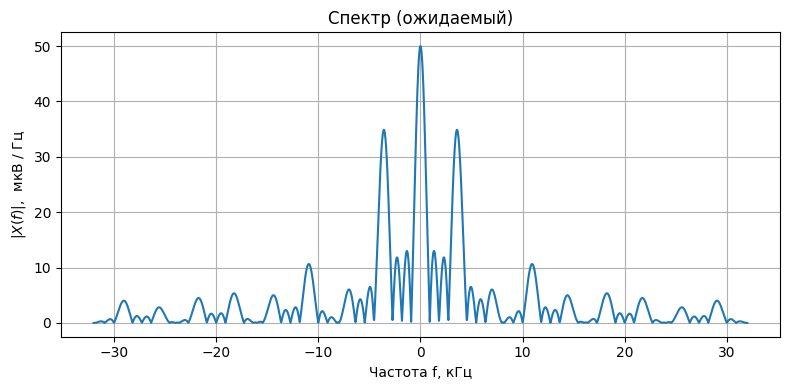

In [29]:
N=4
tau=125e-6 #125 мкс
period = 275e-6 

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    
    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В
    
t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

def predicted(f):
    return 0.1 * tau * (np.sin(np.pi*tau*f))/(np.pi*tau*f) * (np.sin(N*np.pi*period*f))/(np.sin(np.pi*period*f))

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, abs(predicted(f_band))*1e6)
plt.title("Спектр (ожидаемый)")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout()
plt.grid()

Спектры очень похожи, не учитывая мелких аномалий в полученном спектре.

# Занятие 3. Эффект наложения спектров при дискретизации сигналов.

## Задача 3.1. Эффект наложения при дискретизации прямоугольного импульса

|  Варианты:  |  1  |  2  |   3  |   4  |  5  |   6  |  7  |   8  |   9  |  10 |  11  |  12  |
|:-----------:|:---:|:---:|:----:|:----:|:---:|:----:|:---:|:----:|:----:|:---:|:----:|:----:|
| $\tau$**, мкс** | 100 | 500 | 1000 | 5000 | 400 | 2000 | 300 | 1500 | 3000 | 800 | 3500 | 4000 |


Рассмотреть прямоугольный импульс длительностью $1.05\tau$. Дискретизовать его с частотой $f_s  = 10/ \tau $.  Построить спектр прямоугольного импульса и полученного дискретизованного сигнала. 

Пронаблюдать наложение спектра при дискретизации. 

Найти сигнал,  который дискретизуется такой же последовательностью, как и прямоугольный импульс, но при этом не наблюдается эффект наложения (сигнал, который восстанавливается с помощью интерполяционного ряда Котельникова).

In [30]:
def DTFT_abs3(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-1.5, 1.5, 1/M), np.hstack((res, res, res)) 

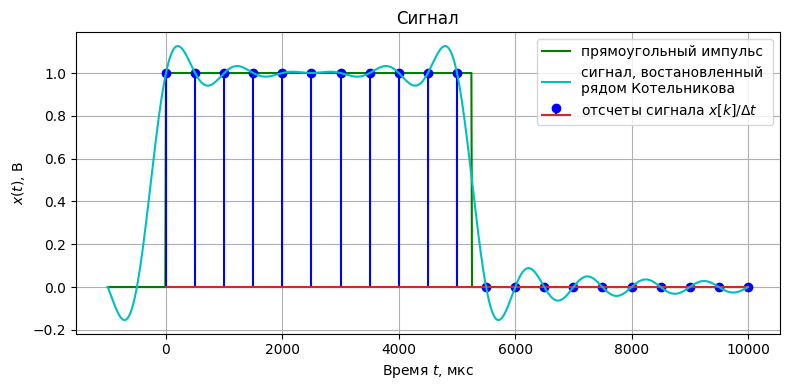

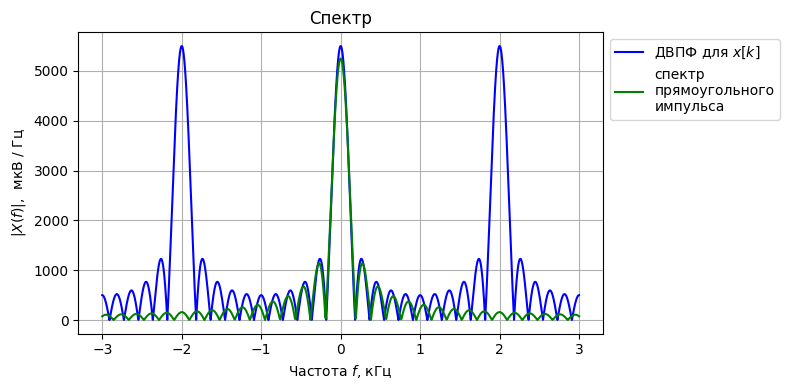

In [31]:
tau=5000*1e-6 #5000 мкс
fs=10/tau

f_band=np.linspace(-1.5*fs, 1.5*fs, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0 <= t <= 1.05*tau:
        return 1.0 
    elif np.isclose(t, 1.05*tau, atol=1e-12) or np.isclose(t, 0, atol=1e-12):
        return 1.0 
    else:
        return 0.0 

def sinc_phi(t, k, fs):
    dt=1/fs
    if np.isclose(0, t-k*dt):
        return 1.0
    else:
        return np.sin(np.pi*fs*(t-k*dt))/(np.pi*fs*(t-k*dt))
    
def sinc_interp(t, xk):
    return sum([xk[k]*fs*sinc_phi(t, k, fs) for k in range(len(xk))])

tk = np.arange(0, 2*tau+1.0/fs, 1.0/fs, dtype=float)
xk = np.array([(1/fs)*boxcar(tk1, tau) for tk1 in tk])
    
t_band=np.linspace(-0.2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band], 'g', label='прямоугольный импульс')
plt.stem(tk*1e6, xk*fs, linefmt='b', markerfmt='bo', label='отсчеты сигнала $x[k]/{\\Delta t}$')



plt.plot(t_band*1e6, np.array([sinc_interp(t, xk) for t in t_band]), 'c', label='сигнал, востановленный \nрядом Котельникова')

plt.title("Сигнал")
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

plt.figure(figsize=[8, 4])


DFTF_plot=DTFT_abs3(xk, fs)
plt.plot(DFTF_plot[0]/1e3, DFTF_plot[1]*1e6, 'b', label='ДВПФ для $x[k]$')

plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, 
         'g', label='спектр\nпрямоугольного\nимпульса')

plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

## Задача 3.2. Эффект наложения при прореживании сигнала

| Варианты: | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12 |
|:---------:|----|----|----|----|----|----|----|----|----|----|----|----|
| $K_1$     | 35 | 10 | 20 | 25 | 15 | 40 | 20 | 15 | 40 | 35 | 10 | 25 |
| $K_2$     | 70 | 60 | 65 | 80 | 75 | 90 | 85 | 60 | 95 | 80 | 70 | 75 |


Выполнить прореживание (downsampling) сигнала камертона из файла `tuning-fork.wav` (основная частота сигнала 440 Гц, частота дискретизации 44100 Гц) без предварительной фильтрации, оставляя в одном случае каждый $K_1$-ый, а в другом каждый $K_2$-ый отсчет сигнала. В чем принципиальное отличие между спектрами получившихся сигналов и какими эффектами оно обусловлено? 

In [32]:
def DTFT_abs(xk, fs, M=2**17):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-0.5, 0.5, 1/M), np.hstack((res)) 

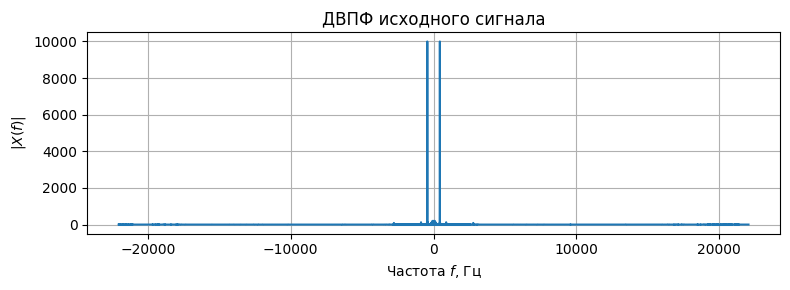

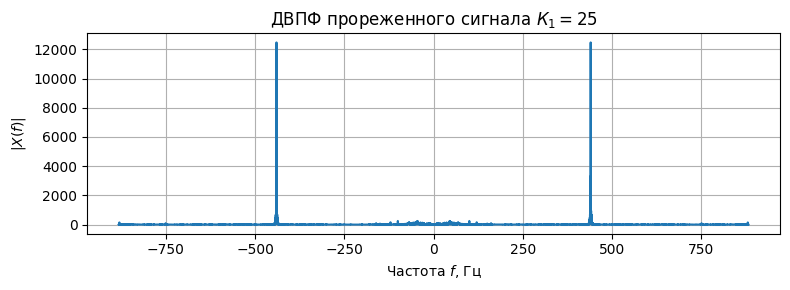

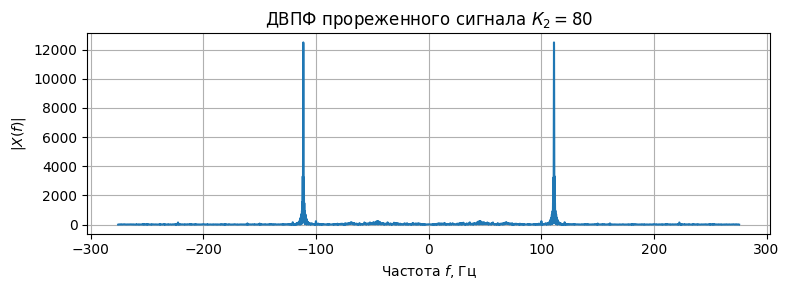

In [33]:
fs, x=scipy.io.wavfile.read('tuning-fork.wav')
#for mono channel 
#x=x[:,1] 

plt.figure(figsize=[8, 3], dpi=100)

DFTF_plot=DTFT_abs(x/fs, fs)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ исходного сигнала")
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[8, 3], dpi=100)
K1=25
y=x[::K1]
DFTF_plot=DTFT_abs(y/(fs/K1), fs/K1)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_1=$%i" %K1)
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[8, 3], dpi=100)
K2=80
y=x[::K2]
    
DFTF_plot=DTFT_abs(y/(fs/K2), fs/K2)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_2=$%i" %K2)
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 